
# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


This dataset is composed of around 110000 medical appointements in brasil it shows many informations concerning the patient and his personal details like gender age health issues...The last column is named no show and it got a binary value Yes or No.

Lets dive in for more details, the dataset is composed of exactely 110527 rows and 14 columns :(PatientId,AppointmentID, Gender,ScheduledDay,AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension,Diabetes, Alcoholism,Handcap,SMS_received,No-show). Next will be a short description for each column:
>**PatientId**: A unique identification  for each unique patient.
>**Appointementid**: A unique identification for each unique appoitement.
>**Gender**: The gender of the patient male(M) or female(F).
>**ScheduledDay**:The date and time of the registration of the appointement.
>**AppoitementDay**:The date of the appointement.
>**Age**: The age of the patient.
>**Neighbourhood**: The name of the neighberhood where the patient live.
>**Scholarship**: If the patient benefit from social allowance (1) or not (0).
>**Hipertension/Diabetes/Alcoholism/Handcap**: If the patient got one of this situations (1) else its (0)
>**SMS_received**: 1 received and 0 for no.
>**No-show**: Yes if the patient showed for appoitement and No if not.



### Question(s) for Analysis

After taking a look at our dataset we can think of two questions : How impacteful each variable on the result not showing to the appointement or showing.than wich two  may have a good impact on our result. 

To answer those question we need to first to check wich columns affect our result (the last column No show) and wich combination of variables is the  most impacteful on No_show



In [479]:
#modules loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling


### General Properties


In [480]:
#Loading data :

data=pd.read_csv("/home/workspace/Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")


In [481]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [482]:
data.shape  #the shape of the dataset

(110527, 14)

In [483]:
data.dtypes #the type of each column

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [484]:
data.describe()  # general description mean standard deviation total  min and max and the quartiles

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### from the first look we can notice some problems with the age as we have a min age of -1 
#### over 75% of the patients dont have 'Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap'
#### there is also the fact that we have two id columns that should be dropped
#### and some columns should be transformed so we can get better informations on them like no show gender...


## Data cleaning


### Column name modification

In [485]:
data=data.rename(columns = {'No-show' : 'No_show'}) #Column name modification

In [486]:
data.columns #columns names

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No_show'],
      dtype='object')

### Columns "No_show" and "Gender" values modifications

In [487]:
data['No_show'] = data['No_show'].map( {'Yes':1 ,'No':0})
data["Gender"]=data["Gender"].map({"M":0,"F":1})        #male 0 and female 1

In [488]:
data.dtypes

PatientId         float64
AppointmentID       int64
Gender              int64
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No_show             int64
dtype: object

In [489]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


#### Deleting  the two columns "Patientid" and "Appointementid" as id columns wont have any impact in our results 

In [490]:
data.drop(columns=["PatientId","AppointmentID"],inplace=True)
data.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [491]:
data.shape

(110527, 12)

#### Checking  duplicated rows and null values

In [492]:
data.info() #information of null values and numbers of rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null int64
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null int64
dtypes: int64(9), object(3)
memory usage: 10.1+ MB


In [493]:
data.isnull().sum() #null check

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
dtype: int64

#### no null values in our dataset

In [494]:
print(data.duplicated().sum())  #check duplicate

635


### we have 635 duplicated rows they will be dropped with drop duplicate  
### we can now take a look at our last 4 columns i will be working on them as a duo age and neighberhood than ScheduledDay and AppointmentDay


In [495]:
#drop duplicates

data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)   #resetting index after drop
data.shape

(109892, 12)

In [496]:
print(data.duplicated().sum()) #check duplicate

0


### Age and Neighbourhood
##### For age : it should be >0 and i will segmentize it to 4 diffrents sections (0-14) child (15-24) youth (25-39) young man (40-64) adult  and 65+ senior those segements will be affected 5 values 0 , 1 , 2 , 3 and 4
 

##### For neighberhood: we got the names of 81 unique neighberhood we will use labelencoder to change them to unique int values

In [497]:
#Age

In [498]:
data["Age"].describe() #age statistical description

count    109892.000000
mean         37.089506
std          23.121196
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [499]:
data["Age"].loc[data.Age<=0].sum() #chekc for abnormal age

-1

In [500]:
data["Age"].loc[data.Age<=1].sum() #check for age less than 1 year

2270

### we can consider every age of 0 as a baby less than a year so we will only drop the row with age == -1

In [501]:
print(data["Age"].loc[data.Age<0].index)  #check row index

Int64Index([99240], dtype='int64')


In [502]:
data.drop(index=99240,inplace=True)               #dropping the row with its index value
data.reset_index(drop=True, inplace=True)         # index reset

In [503]:
data.shape #shape

(109891, 12)

In [504]:
data["Age"].describe() #desc 

count    109891.000000
mean         37.089853
std          23.121015
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

#### our min is 0 now so we can now mouve on to age segmentation

In [505]:
# segmentation   (# thanks for labels tip i will make sure to have it in any segmentation cleaning i need to do as 
#it really help later especially with the second great tip unstack  )

seg=[0,14,24,39,65,115]



labels=['0-14','15-24','25-39','40-65','66-115']

data['Age_groups']=pd.cut(x=data['Age'],bins=seg,labels=labels,include_lowest=True)


In [506]:
data.head(5) #show head

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age_groups
0,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,40-65
1,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,40-65
2,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,40-65
3,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0-14
4,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,40-65


In [507]:
data.query('Age==40')[['Age','Age_groups']].head(7)

,Age,Age_groups
17,40,40-65
283,40,40-65
338,40,40-65
477,40,40-65
549,40,40-65
663,40,40-65
696,40,40-65


In [508]:

data['Age_categ'] = data.Age_groups.cat.codes           #affecting keys for our segements   
data['Age_categ']=data['Age_categ'].astype('int64')            #0 child   0  14
                                                               #1 youth  15  24 
                                                               #2 young man 25 39
data.head(5)                                                   #3 adult  40 64
                                                               #4 Senior  65+
                                                              

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age_groups,Age_categ
0,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,40-65,3
1,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,40-65,3
2,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,40-65,3
3,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0-14,0
4,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,40-65,3


In [509]:
data.drop(columns=["Age"],inplace=True)       #drop age  column as we dont need it anymore

data.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No_show', 'Age_groups', 'Age_categ'],
      dtype='object')

In [510]:
column_names = ['Gender', 'Age_groups','Age_categ','ScheduledDay', 'AppointmentDay', 'Neighbourhood',             #Reorginizing columns
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No_show']
data = data.reindex(columns=column_names)
data.head(5)

,Gender,Age_groups,Age_categ,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,1,40-65,3,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,JARDIM DA PENHA,0,1,0,0,0,0,0
1,0,40-65,3,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,JARDIM DA PENHA,0,0,0,0,0,0,0
2,1,40-65,3,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,MATA DA PRAIA,0,0,0,0,0,0,0
3,1,0-14,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,1,40-65,3,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,JARDIM DA PENHA,0,1,1,0,0,0,0


In [511]:
#Neighberhood

In [512]:
data["Neighbourhood"].nunique() #check unique values ina column

81

as we have many unique values we will use Label encoder from sklearn module 

In [513]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["Neighbourhood"] = labelencoder.fit_transform(data["Neighbourhood"])  #label encoding to change neighberhood names 

In [514]:
data.head(5) #check head

,Gender,Age_groups,Age_categ,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,1,40-65,3,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,39,0,1,0,0,0,0,0
1,0,40-65,3,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,39,0,0,0,0,0,0,0
2,1,40-65,3,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,45,0,0,0,0,0,0,0
3,1,0-14,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,54,0,0,0,0,0,0,0
4,1,40-65,3,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,39,0,1,1,0,0,0,0


### i did a litle cleaning for datetime columns if possible can u give me your opinion if thats how its supposed to be or maby i should make unique columns  and thanks i wont be unsing them in my next analysis. 




###  now we will clean the datetime format for both of AppointementDay and ScheduledDay
### for both columns we have datetime format of yyyy-mm-ddThh:mm:ssZ we need to delete T and Z to get a clean datatime format

In [515]:

#AppointementDay
data['AppointmentDay'] = data['AppointmentDay'].str.replace(r'T', ' ')     #deleting T and Z from string
data['AppointmentDay'] = data['AppointmentDay'].str.replace(r'Z', '')

data["AppointmentDay"] =pd.to_datetime(data["AppointmentDay"])          #transformign to datetime format


In [516]:

#ScheduledDay
data['ScheduledDay'] = data['ScheduledDay'].str.replace(r'T', ' ')
data['ScheduledDay'] = data['ScheduledDay'].str.replace(r'Z', '')

data["ScheduledDay"] =pd.to_datetime(data["ScheduledDay"])


In [517]:
data.head(5) #check head

,Gender,Age_groups,Age_categ,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,1,40-65,3,2016-04-29 18:38:08,2016-04-29,39,0,1,0,0,0,0,0
1,0,40-65,3,2016-04-29 16:08:27,2016-04-29,39,0,0,0,0,0,0,0
2,1,40-65,3,2016-04-29 16:19:04,2016-04-29,45,0,0,0,0,0,0,0
3,1,0-14,0,2016-04-29 17:29:31,2016-04-29,54,0,0,0,0,0,0,0
4,1,40-65,3,2016-04-29 16:07:23,2016-04-29,39,0,1,1,0,0,0,0


In [518]:
data['AppointmentDay'].dt.day.unique()  #unique dates

array([29,  3, 10, 17, 24, 31,  2, 30, 16,  4, 19, 12,  6, 20,  5, 13,  9,
       25, 11, 18, 14,  7,  1,  8])

In [519]:
data.dtypes #data types

Gender                     int64
Age_groups              category
Age_categ                  int64
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Neighbourhood              int64
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No_show                    int64
dtype: object

In [520]:
data.shape #shape

(109891, 13)

### Anyway we wont be using both columns in our analysis so we will drop them before saving the cleaned dataset

In [521]:
data.drop(columns=["ScheduledDay","AppointmentDay"],inplace=True)  #dropping columns
data.head(5)

,Gender,Age_groups,Age_categ,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,1,40-65,3,39,0,1,0,0,0,0,0
1,0,40-65,3,39,0,0,0,0,0,0,0
2,1,40-65,3,45,0,0,0,0,0,0,0
3,1,0-14,0,54,0,0,0,0,0,0,0
4,1,40-65,3,39,0,1,1,0,0,0,0


In [522]:
data.shape  #shape

(109891, 11)

In [523]:
data.to_csv('clean_data.csv', index=False) #saving file

### now our dataset looks very good  

<a id='eda'></a>
## Exploratory Data Analysis



### relation between nowshow and the other columns study
#### wich columns affect no_show

In [524]:
data=pd.read_csv("clean_data.csv") #read data

In [525]:
data.describe() #descibe

,Gender,Age_categ,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
count,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000
mean,0.649880,2.036427,41.767670,0.098288,0.197250,0.071826,0.030430,0.022131,0.322884,0.201090
std,0.477009,1.339242,22.346019,0.297705,0.397924,0.258200,0.171769,0.160879,0.467581,0.400817
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,4.000000,80.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


####  many variables have a binary distribution with rates around 3 quarts

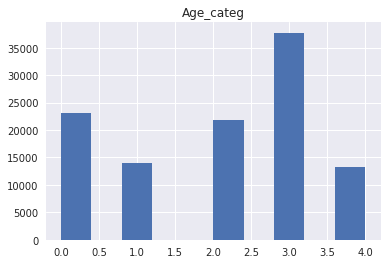

In [526]:
data.hist("Age_categ"); #histogram for age  

#### distrubition of dataset samples by age category

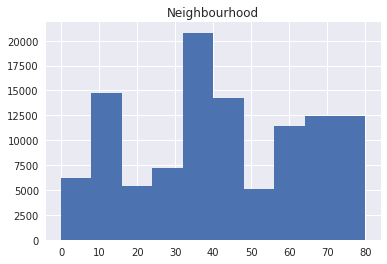

In [527]:
data.hist("Neighbourhood"); #histogram of neighberhood

#### distrubition of dataset samples by neighberhood 

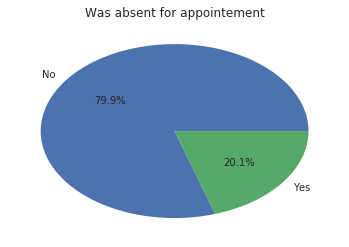

In [528]:
plt.pie(data["No_show"].value_counts(),labels = ['No', 'Yes'],autopct = '%1.1f%%'); #the pie plot show
plt.title('Was absent for appointement'); #title for plot
plt.show() #command to show plot

#### 20% of samples did not show up
#### looking at those statistics and figures we can notice that Over 75% of our dataset samples that did show (No_show value=0) dont have health problems (hypertension, diabetes,alcoholism,handicap) 
#### Also most of seniors 85% (2046/13248) did show for appointement
#### to have a better look our our data ditrubition we will split the dataset to showed and absent

In [529]:
showed=data.No_show == 0  #data for those who showed
absent=data.No_show == 1   #data for those who didnt

#### boolean distribution for not showing as true in absent and false in showed

####



#### Now we will use the heatmap from seaborn module to get an idea about the correlation value between the variables

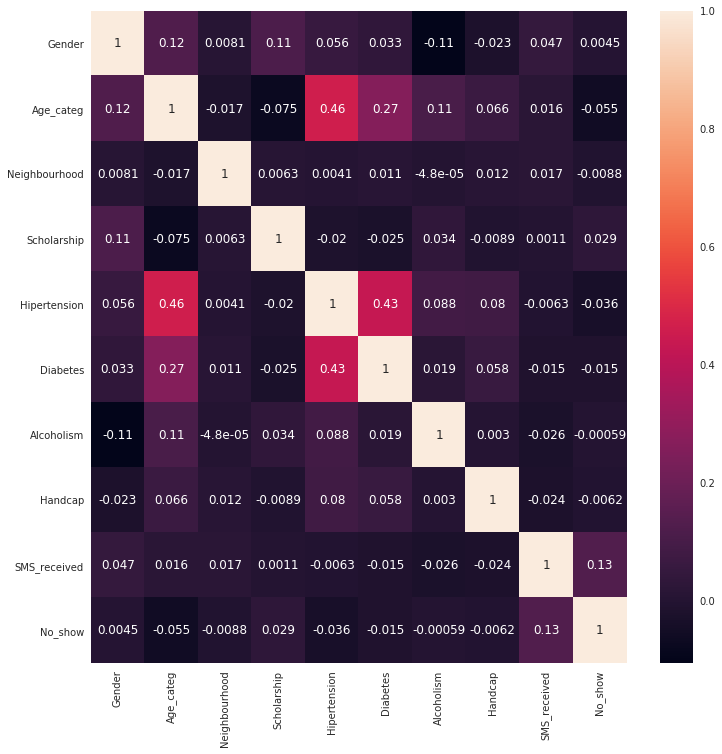

In [530]:
correlation = data.corr()
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(correlation, annot=True)
plt.show()

### as we have mostly binary values its hard to check for easy correlations with only heatmap values 

### now we check the distribution for each column in relation with No_show and try to deduce impact

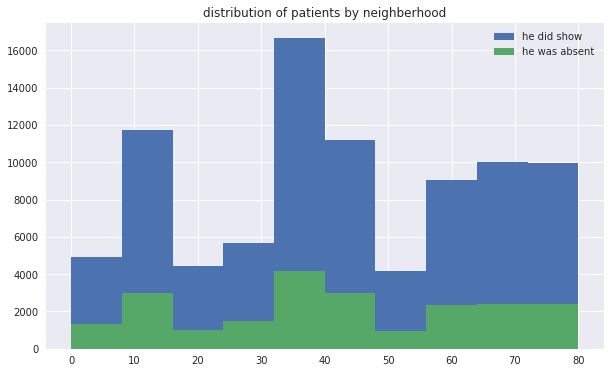

''

In [531]:

data["Neighbourhood"][showed].hist(label = 'he did show',figsize=[10,6])
data["Neighbourhood"][absent].hist(label = 'he was absent',figsize=[10,6])
plt.title("distribution of patients by neighberhood")
plt.legend();
plt.show()
;
#  
# 

#### neighberhood distrubtion is way stacked that it dont give us any useful informations

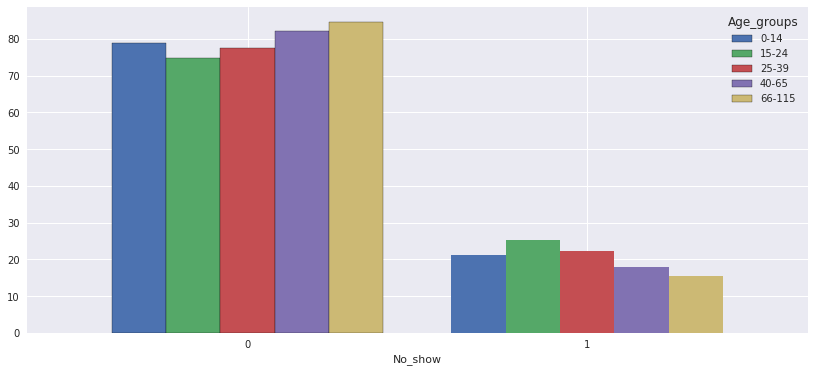

In [532]:
data.groupby("Age_groups")["No_show"].value_counts(normalize=True).unstack("Age_groups").mul(100).plot.bar(edgecolor="black"
                                                                                                          ,figsize=[14,6],
                                                                                                          rot=0,width=0.8);

#### age may have an impact on No_show results

In [533]:
def composition(col):  
    '''
    docstring: composition is a function taht plot a variable from appointements dataset with the destination variable No_show from the same dataset
    inputs: col : a column name of a dataframe in a form  of a string:   "Column_name" 
    output: the plotted graph col ~~~No_show
    '''
    data.groupby(col)["No_show"].value_counts(normalize=True).unstack(col).mul(100).plot.bar(edgecolor="black"
                                                                                                          ,figsize=[14,6],
                                                                                                          rot=0,width=0.8);                                                              
    plt.title("distribution of patients by " +col);
    plt.legend();
    return plt.show();

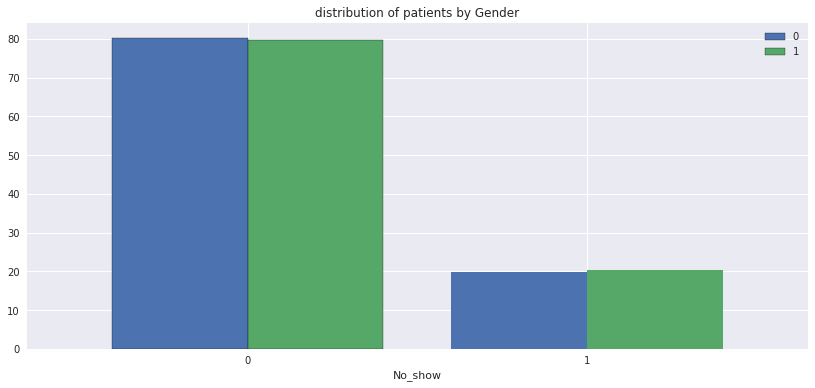

In [534]:
composition("Gender")  #0 male / 1 female

In [535]:
data.groupby(["Gender"])['No_show'].count()  #will make sure to use labels on my next projects to get an easy switch between int values and labels when needed

Gender
0    38475
1    71416
Name: No_show, dtype: int64

#### females almost two thirds of sampels we may have an important impact

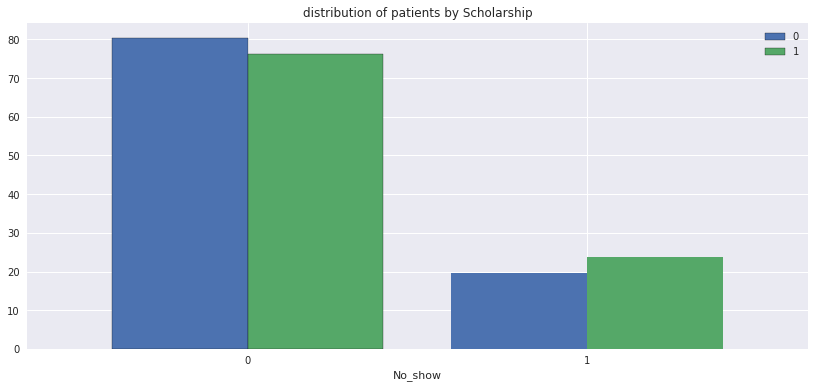

In [536]:
composition("Scholarship") #0 no  aid 1 got aid

#### over 90% of samples dont have a scholarship  

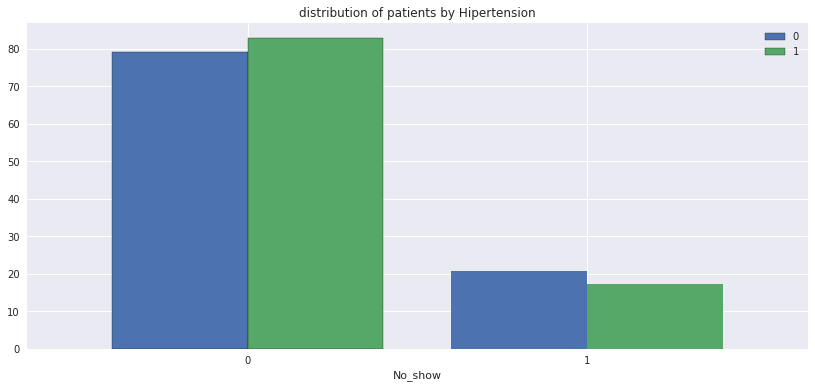

In [537]:
composition("Hipertension") # 0 dont have 1 have hypertension

#### most of those who got hypertension did show it may have a good enougth impact

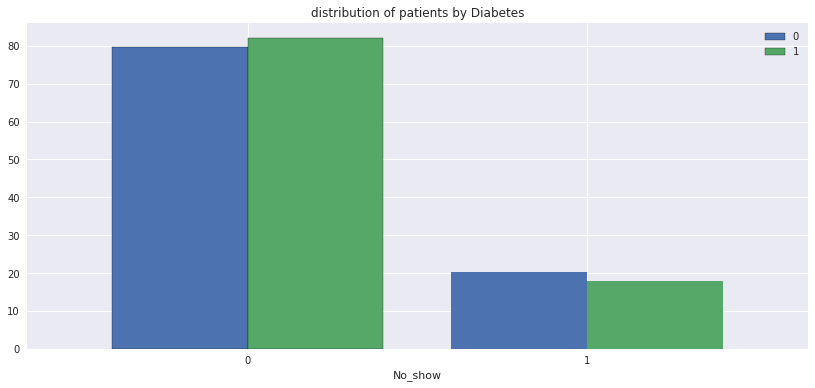

In [538]:
composition("Diabetes")

####  smal number of samples on no_show 

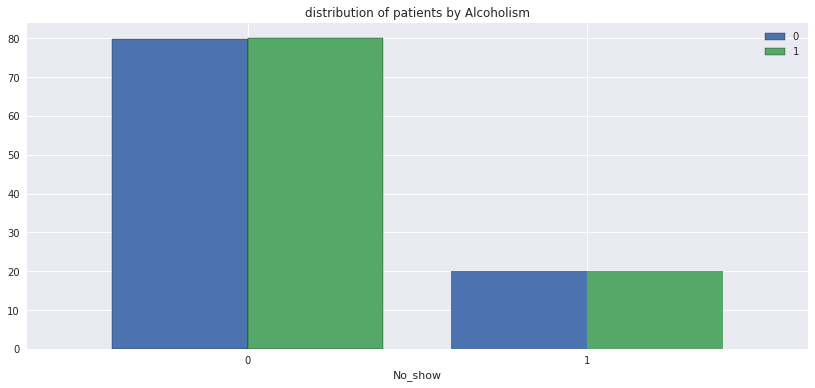

In [539]:
composition("Alcoholism")

In [540]:
data.groupby(["Alcoholism"])['No_show'].count()

Alcoholism
0    106547
1      3344
Name: No_show, dtype: int64

#### looking at this distribution we have a very small number of samples of people with alcoholism

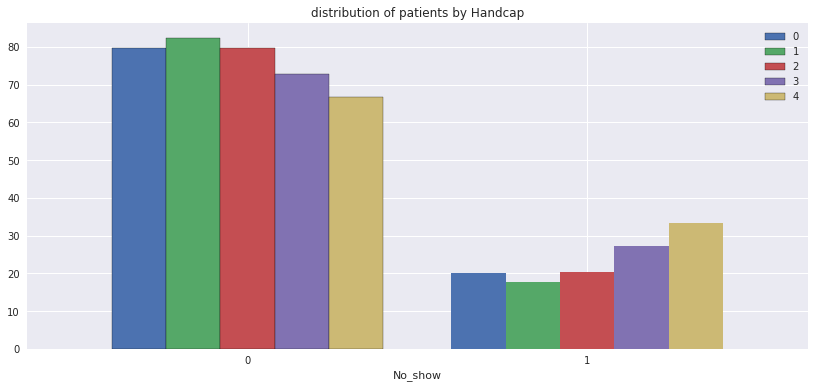

In [541]:
composition("Handcap")

#### not enought information on handcap segements 

In [542]:
data.groupby(["Handcap"])['No_show'].count() #samples distribution

Handcap
0    107672
1      2023
2       182
3        11
4         3
Name: No_show, dtype: int64

#### looking at this distribution we have a very small number of samples of people with handicap 

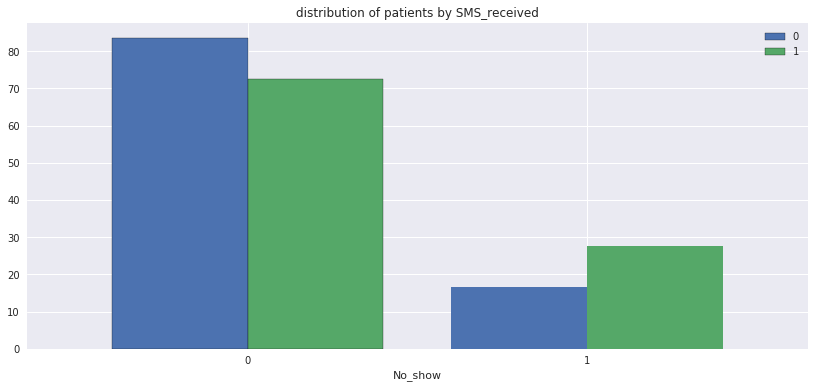

In [543]:
composition("SMS_received")

#### SMS_received look impacteful and it has a corr of 0.13

# Question 2 :  Wich 2  variables   are  impacteful on No_show together

### i will be focusing my analysis on the two variables gender and hypertension 


In [544]:
data["absents"]=data["No_show"]==1

In [545]:
databsent=data.loc[data["No_show"]==1]

### hir we did add  a column absents where no_show is true and a new dataframe databsent containing only  the samples that didnt show to the appointement

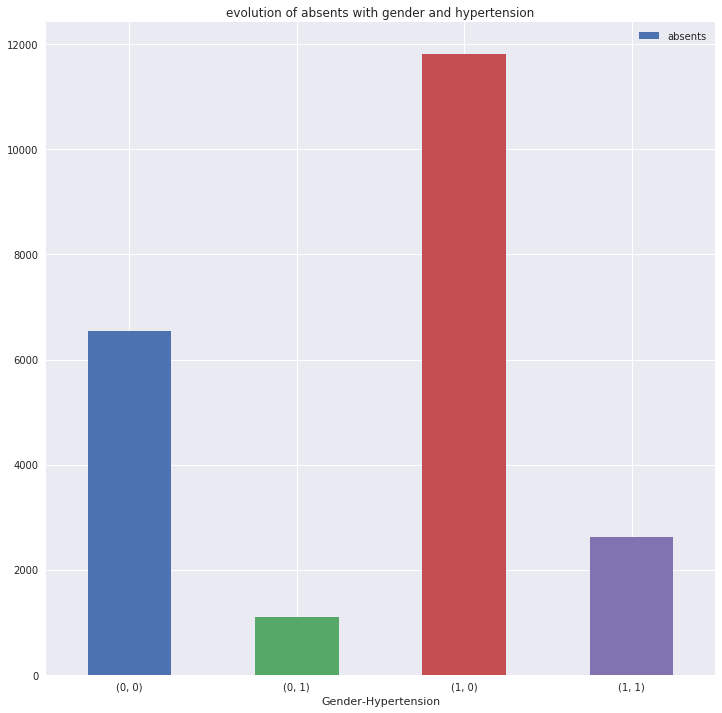

In [546]:
databsent.groupby(["Gender","Hipertension"])['absents'].count().plot(kind='bar',rot=0)  ; #this plot show us the evolution of the number absents 
plt.title("evolution of absents with gender and hypertension")         
                                                                    #depending  on the combination male with our without hypertension 
plt.xlabel('Gender-Hypertension')                                    #and female with or without
plt.legend()
plt.show()

#### Loooking at this plot  we can conclude there is a high peak in the number of female patients with hypertension that didnt show so we may consider that type of samples to have a much higehr chance of missing their appointement in comparaison to the other combinations

<a id='conclusions'></a>
## Conclusions

#### We have a dataset composed of informations about over 110 k medical appointements in Brazil with a last colum called No_show that have a Yes or No anwser for the question : Was the patient absent from the appointement

#### After first analysis of the data we found that 20% of the patients didnt show at rdv time wich may cause problems and disturb the normal work of the system

#### This analysis did show that at least we have 5 variables that may affect the possibilty of showing to the appointement and they are Age, Gender,Scholarship, Hypertension and SMS_received

#### A combination of a gender female and a positive hypertension did show that there is an increased risk of not showing to the appointements

## Limitations of this analysis

#### We got an almost complete dataset with no null values and very limited duplicated rows wich isnt the case  usually
#### the data was collected in a period spaning less than 3 months so it may not give enought informations to have a strong reflection on the population more time and entries should help getting a much better view
#### we did limit the columns used in this analysis (date columns for exemple) we can get otehr results depending on our intial variables
#### satistical analysis and  machine learning techniques and modules wasent included in this analysis they will help a lot in getting more precise conclusions





0

In [551]:
# 